In [1]:
import cv2
from PIL import Image
import numpy as np
from mss import mss
import imutils
from matplotlib import pyplot as plt

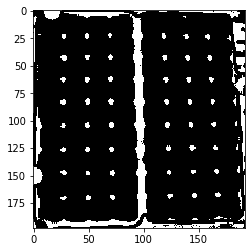

In [10]:
#Finding the borders of the cells on the panel as points

def plotImg(img):
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
        plt.show()
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
img = cv2.imread(r"1.jpg")

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
binary_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 51, 15)
plotImg(binary_img)

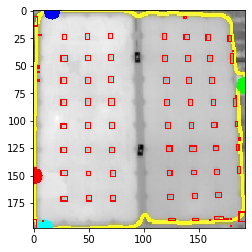

True

In [11]:
_, _, boxes, _ = cv2.connectedComponentsWithStats(binary_img)
# first box is the background
boxes = boxes[1:]
filtered_boxes = []
for x,y,w,h,pixels in boxes:
    if pixels < 10000 and h < 10 and w < 10 :
        filtered_boxes.append((x,y,w,h))
        #print(x,y,w,h)

for x,y,w,h in filtered_boxes:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255),1)

plotImg(img)

cv2.imwrite(r"C:\Users\diyas\Downloads\4.jpg",img)


In [4]:
cv2.imshow('window_frame', np.array(img))
cv2.waitKey(0)


-1

In [12]:
#METHOD 1
#USING GRIDS
sct_img = img

img = np.array(sct_img)
line_color = (0, 255, 0)
thickness = 1
type_ = cv2.LINE_AA
pxstep = 25
x = pxstep
y = pxstep
while x < img.shape[1]:
    cv2.line(img, (x, 0), (x, img.shape[0]), color=line_color, lineType=type_, thickness=thickness)
    x += pxstep

while y < img.shape[0]:
    cv2.line(img, (0, y), (img.shape[1], y), color=line_color, lineType=type_, thickness=thickness)
    y += pxstep

cv2.imshow('window_frame', np.array(img))
cv2.waitKey(0)


-1

In [13]:
#METHOD 2
#Joining the dots
import numpy as np
import cv2

img = cv2.imread(r"1.jpg")

img2 = cv2.imread(r"1.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img= cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 51, 15)
cv2.imshow('window_frame', img)
cv2.waitKey(0)
cnts = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
listx = []
listy=[]

for i in range(0, len(cnts)):
    c = cnts[i]
    size = cv2.contourArea(c)
    if size < 1000 and size>0:
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        listx.append(cX)
        listy.append(cY)
listxy = list(zip(listx,listy))
listxy = np.array(listxy)

for i in range(0, len(listxy)):    
    x1 = listxy[i,0]
    y1 = listxy[i,1]
    distance = 0
    secondx = []
    secondy = []
    dist_listappend = []
    sort = []   
    for j in range(0, len(listxy)):      
        if i == j:
            pass     
        else:
            x2 = listxy[j,0]
            y2 = listxy[j,1]
            distance = np.sqrt((x1-x2)**2 + (y1-y2)**2)
            secondx.append(x2)
            secondy.append(y2)
            dist_listappend.append(distance)               
    secondxy = list(zip(dist_listappend,secondx,secondy))
    sort = sorted(secondxy, key=lambda second: second[0])
    sort = np.array(sort)
    cv2.line(img2, (x1,y1), (int(sort[0,1]), int(sort[0,2])), (0,0,255), 2)

cv2.imshow('img', img2)
cv2.waitKey(0)
cv2.imwrite('connected.png', img2)

True

In [9]:
#using the grid method to crop all the cells as seperate images
import cv2

im =  cv2.imread(r"1.jpg")

imgwidth=im.shape[0]
imgheight=im.shape[1]
y1 = 0
M = imgwidth//8
N = imgheight//9
count=0
for x in range(0,imgwidth,M):
    for y in range(0, imgheight, N):
        x1 = x + M
        y1 = y + N
        tiles = im[x:x+M,y:y+N]
        count=count+1
        #print(y1)
        cv2.rectangle(im, (x, y), (x1, y1), (0, 255, 0))
        cv2.imwrite(r"C:\Users\diyas\Downloads\save\cell"+str(count)+".png",tiles)

cv2.imwrite("asas.png",im)

True